In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [166]:
df_full = pd.read_csv('collected_data.csv').dropna(subset=['Product'])
df_full = df_full.drop(columns=['Unnamed: 8','Unnamed: 9'])
df_country = pd.read_csv('iisystem.csv', header=None)
df_distance = pd.read_csv('capdist.csv')
df_distance = df_distance[df_distance['ida'] == 'FRN']
df_distance = pd.merge(df_distance, df_country, left_on='idb', right_on=1)[['numa','ida','numb','idb','kmdist', 2]]
df_distance = df_distance.rename(columns={2:'name'})
df_distance['name'] = df_distance['name'].str.lower()
df_distance = df_distance.drop_duplicates()

Text(0.5, 1.0, 'Price per kilo according to production country')

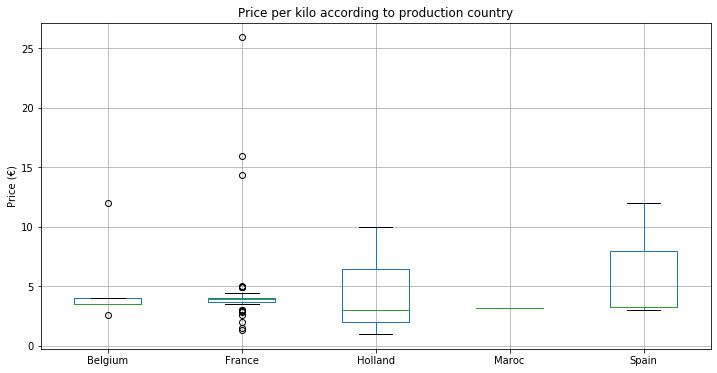

In [167]:
plt.figure(figsize=(12,6))
df_full[['Price (kg)', 'Origin']].groupby('Origin').boxplot(subplots=False)
plt.xticks([1, 2, 3, 4, 5], ['Belgium', 'France', 'Holland', 'Maroc', 'Spain'])
plt.ylabel('Price (€)')
plt.title('Price per kilo according to production country')

Text(0.5, 1.0, 'Price per kilo according to shop type')

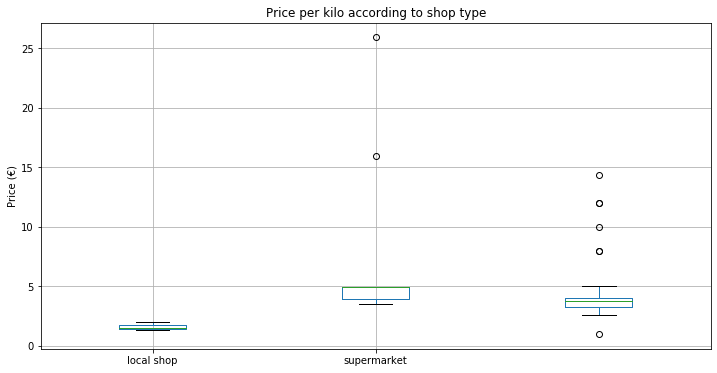

In [168]:
plt.figure(figsize=(12,6))
df_full[['Price (kg)', 'Shop type']].groupby('Shop type').boxplot(subplots=False)
plt.xticks([1, 2], ['local shop', 'supermarket'])
plt.ylabel('Price (€)')
plt.title('Price per kilo according to shop type')

Text(0.5, 1.0, 'Price per kilo according to shop type')

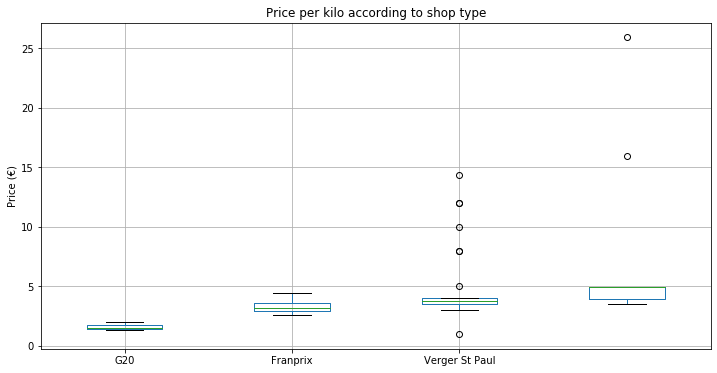

In [169]:
plt.figure(figsize=(12,6))
df_full[['Price (kg)', 'Shop']].groupby('Shop').boxplot(subplots=False)
plt.xticks([1, 2, 3], ['G20', 'Franprix', 'Verger St Paul'])
plt.ylabel('Price (€)')
plt.title('Price per kilo according to shop type')

In [170]:
pourcent de bio dans chaque magasin
prix par distance

SyntaxError: invalid syntax (<ipython-input-170-748dba682e0c>, line 1)

In [171]:
def get_dist(x):
    if x == 'france':
        return 0
    else:
        if len(df_distance[df_distance['name'] == x]['kmdist'].values) >= 1:
            return df_distance[df_distance['name'] == x]['kmdist'].values[0]

In [172]:
df_full['distance'] = df_full['Origin'].apply(get_dist)

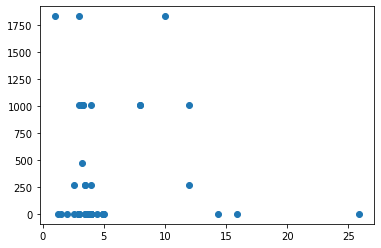

In [173]:
plt.plot(df_full['Price (kg)'], df_full['distance'], 'o')